## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## Dataset Fields Decription :
Product Purchased:	KP281, KP481, or KP781
    
Age:	In years
    
Gender:	Male/Female
    
Education:	In years
    
MaritalStatus:	Single or partnered
    
Usage:	The average number of times the customer plans to use the treadmill each week.
    
Income:	Annual income (in $)
    
Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
    
Miles:	The average number of miles the customer expects to walk/run each week

## Product Portfolio:

- The KP281 is an entry-level treadmill that sells for $1,500.

- The KP481 is for mid-level runners that sell for $1,750.

- The KP781 treadmill is having advanced features that sell for $2,500.

In [17]:
import pandas as pd
import numpy as np

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1.  Checking the structure & characteristics of the dataset

In [30]:
# Aerofit Treadmill Product data is for prior 3 months 
df = pd.read_csv('Aerofit.csv')
df   

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [19]:
df.shape   # 180 rows and 9 columns

(180, 9)

In [20]:
df.info()  # Shows number of non-null values in each column and the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [21]:
# Note : No null values in columns , 180 rows total 
# Getting the number of unique values in all Object type columns :-

In [22]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [23]:
# Note :  There are 3 type of Treadmill Products offered by Aerofit , each have different price

In [82]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

- Note : Number of Male Customers are more than female

In [86]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

- Note : More customers have Marital Status as Partnered 

In [212]:
# Missing value Check 
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

- Note : There are no missing value in each column

## 2. Detect Outliers

In [71]:
desc_df = df.describe()  # For all int type columns 
desc_df

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [72]:
df.describe(include=object)  # For obj. type columns

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


### Common Mesurements in Decscriptive Statistics 
1. Measure of Central Tendecy - Mean, Meadian (50th Percentile) , Mode 
2. Measure of Spread - Range, IQR , Variance , Standard Dev

In [73]:
desc_df.loc['Range',:]= desc_df.loc['max',:]-desc_df.loc['min',:]
desc_df.loc['IQR',:]=desc_df.loc['75%',:]-desc_df.loc['25%',:]
desc_df

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000
Range,32.000000,9.000000,5.000000,4.000000,75019.000000,339.000000
IQR,9.000000,2.000000,1.000000,1.000000,14609.250000,48.750000


In [74]:
desc_df.loc['Variance',:]= [np.var(df[i]) for i in desc_df.columns]
desc_df.loc['Standard Deviation',:]= [np.std(df[i]) for i in desc_df.columns]
desc_df

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,1.800000e+02,180.000000
mean,28.788889,15.572222,3.455556,3.311111,5.371958e+04,103.194444
std,6.943498,1.617055,1.084797,0.958869,1.650668e+04,51.863605
min,18.000000,12.000000,2.000000,1.000000,2.956200e+04,21.000000
25%,24.000000,14.000000,3.000000,3.000000,4.405875e+04,66.000000
50%,26.000000,16.000000,3.000000,3.000000,5.059650e+04,94.000000
75%,33.000000,16.000000,4.000000,4.000000,5.866800e+04,114.750000
max,50.000000,21.000000,7.000000,5.000000,1.045810e+05,360.000000
Range,32.000000,9.000000,5.000000,4.000000,7.501900e+04,339.000000
IQR,9.000000,2.000000,1.000000,1.000000,1.460925e+04,48.750000


In [76]:
desc_df.loc['Upper Wisker',:]= desc_df.loc['75%',:] + (1.5 * desc_df.loc['IQR',:])
desc_df.loc['Lower Wisker',:]= desc_df.loc['25%',:] - (1.5 * desc_df.loc['IQR',:])
desc_df

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,1.800000e+02,180.000000
mean,28.788889,15.572222,3.455556,3.311111,5.371958e+04,103.194444
std,6.943498,1.617055,1.084797,0.958869,1.650668e+04,51.863605
min,18.000000,12.000000,2.000000,1.000000,2.956200e+04,21.000000
25%,24.000000,14.000000,3.000000,3.000000,4.405875e+04,66.000000
50%,26.000000,16.000000,3.000000,3.000000,5.059650e+04,94.000000
75%,33.000000,16.000000,4.000000,4.000000,5.866800e+04,114.750000
max,50.000000,21.000000,7.000000,5.000000,1.045810e+05,360.000000
Range,32.000000,9.000000,5.000000,4.000000,7.501900e+04,339.000000
IQR,9.000000,2.000000,1.000000,1.000000,1.460925e+04,48.750000


- Note: 'desc_df' shows value of Mean,Median(50%),Range,IQR,Variance and Standard Deviation of all interger columns in data frame. 

- Any value in a column which is greater than (>) then Upper Wisker( UW)  or any value in a column which is less than (<) then Lower Wisker(LW) is called 'OUTLIER'

Total Outliers in Age Column =  5


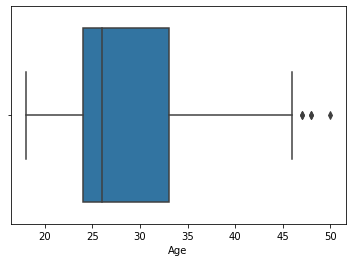

In [109]:
num_Age_outliers = df[(df['Age']> desc_df.loc['Upper Wisker','Age']) | (df['Age']< desc_df.loc['Lower Wisker','Age'])]
print('Total Outliers in Age Column = ',num_Age_outliers.shape[0]) 

sns.boxplot(x=df['Age'])
plt.show()

Total Outliers in Education Column =  4


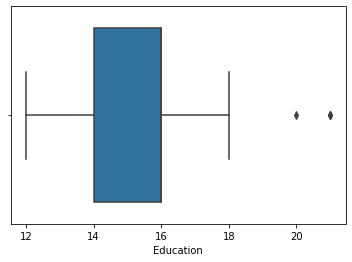

In [108]:
num_Education_outliers=df[(df['Education']> desc_df.loc['Upper Wisker','Education']) | (df['Education']< desc_df.loc['Lower Wisker','Education'])]
print('Total Outliers in Education Column = ',num_Education_outliers.shape[0]) 

sns.boxplot(x=df['Education'])
plt.show()

Total Outliers in Usage Column =  9


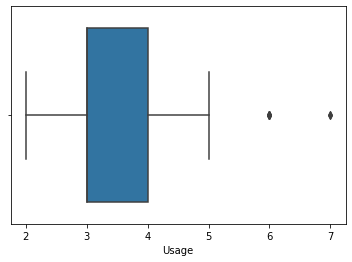

In [107]:
num_Usage_outliers=df[(df['Usage']> desc_df.loc['Upper Wisker','Usage']) | (df['Usage']< desc_df.loc['Lower Wisker','Usage'])]
print('Total Outliers in Usage Column = ',num_Usage_outliers.shape[0]) 

sns.boxplot(x=df['Usage'])
plt.show()

Total Outliers in Fitness Column =  2


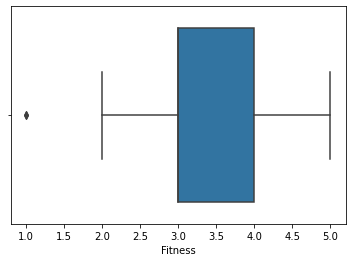

In [106]:
num_Fitness_outliers=df[(df['Fitness']> desc_df.loc['Upper Wisker','Fitness']) | (df['Fitness']< desc_df.loc['Lower Wisker','Fitness'])]
print('Total Outliers in Fitness Column = ',num_Fitness_outliers.shape[0]) 

sns.boxplot(x=df['Fitness'])
plt.show()

Total Outliers in Income Column =  19


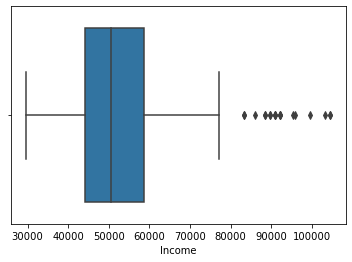

In [105]:
num_Income_outliers=df[(df['Income']> desc_df.loc['Upper Wisker','Income']) | (df['Income']< desc_df.loc['Lower Wisker','Income'])]
print('Total Outliers in Income Column = ',num_Income_outliers.shape[0]) 

sns.boxplot(x=df['Income'])
plt.show()

Total Outliers in Miles Column =  13


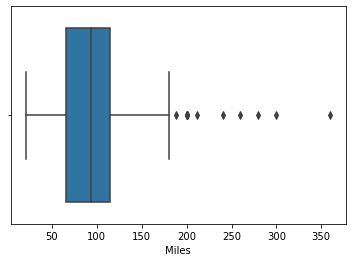

In [104]:
num_Miles_outliers=df[(df['Miles']> desc_df.loc['Upper Wisker','Miles']) | (df['Miles']< desc_df.loc['Lower Wisker','Miles'])]
print('Total Outliers in Miles Column = ',num_Miles_outliers.shape[0]) 

sns.boxplot(x=df['Miles'])
plt.show()

In [111]:
desc_df.loc['Mean-Median',:]=desc_df.loc['mean',:]-desc_df.loc['50%',:]
desc_df

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,1.800000e+02,180.000000
mean,28.788889,15.572222,3.455556,3.311111,5.371958e+04,103.194444
std,6.943498,1.617055,1.084797,0.958869,1.650668e+04,51.863605
min,18.000000,12.000000,2.000000,1.000000,2.956200e+04,21.000000
25%,24.000000,14.000000,3.000000,3.000000,4.405875e+04,66.000000
50%,26.000000,16.000000,3.000000,3.000000,5.059650e+04,94.000000
75%,33.000000,16.000000,4.000000,4.000000,5.866800e+04,114.750000
max,50.000000,21.000000,7.000000,5.000000,1.045810e+05,360.000000
Range,32.000000,9.000000,5.000000,4.000000,7.501900e+04,339.000000
IQR,9.000000,2.000000,1.000000,1.000000,1.460925e+04,48.750000


- Note : Mean is sensitive to outliers and median is not sensitive to outliers , so more the outliers in a column the mean is changed more. 

### Observation :
- Most number of outliers present in Income Column : 19 and Least number of outliers present in Fitness Column : 2
- Above table shows Common Mesurements in Decscriptive Statistics : mean , median (50th Percentile) , standard deviation , variance , IQR , range , min, max . 

## 3. Effect of features like marital status, age on the product purchased (using countplot, histplots, boxplots )

### MaritalStatus Vs Product 

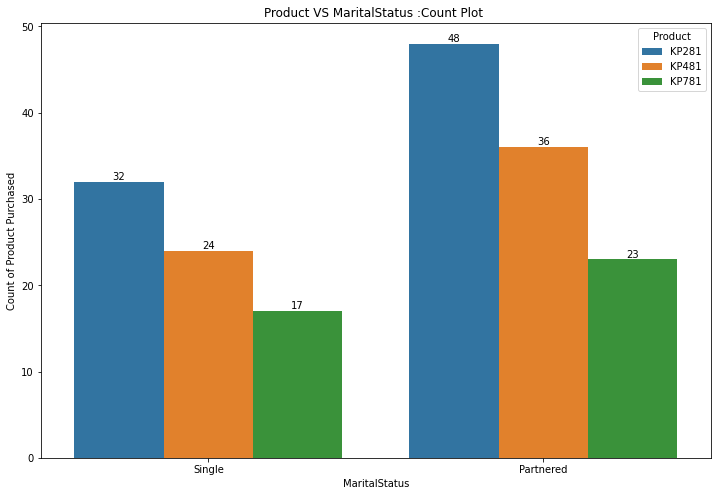

In [151]:
# Countplot of Marital Status - Showing how many products of each category bought by each Marital Status

plt.figure(figsize=(12,8))
ax = sns.countplot(data =df,x='MaritalStatus',hue='Product')

for i in ax.containers:
    ax.bar_label(i)
    
plt.ylabel('Count of Product Purchased')
plt.title('Product VS MaritalStatus :Count Plot ')
plt.show()

### Observation :- 
- From obve count plot we can observe that people with any Marital Status 'Single' or 'Partnered 'tend to buy 'KP281' most follwed by 'KP481' and then 'KP781' . Aslo from above countplot we can infer more number of the Products are bought by People with 'Partnered' Marital Status as compared to 'Single' Marital Status people.

### Age VS Product

In [183]:
df_copy = df.copy()
df_copy

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [184]:
# Creatig Bins and Labels for Age column 
bins   = [15,20,25,30,35,40,45,50,55]
labels = ['15 to 20 yrs','20 to 25 yrs','25 to 30 yrs','30 to 35 yrs','35 to 40 yrs','40 to 45 yrs','45 to 50 yrs','50 to 55 yrs']

df_copy['Age_Labels'] = pd.cut(x=df['Age'],bins =bins,labels =labels)
df_copy

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Labels
0,KP281,18,Male,14,Single,3,4,29562,112,15 to 20 yrs
1,KP281,19,Male,15,Single,2,3,31836,75,15 to 20 yrs
2,KP281,19,Female,14,Partnered,4,3,30699,66,15 to 20 yrs
3,KP281,19,Male,12,Single,3,3,32973,85,15 to 20 yrs
4,KP281,20,Male,13,Partnered,4,2,35247,47,15 to 20 yrs
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,35 to 40 yrs
176,KP781,42,Male,18,Single,5,4,89641,200,40 to 45 yrs
177,KP781,45,Male,16,Single,5,5,90886,160,40 to 45 yrs
178,KP781,47,Male,18,Partnered,4,5,104581,120,45 to 50 yrs


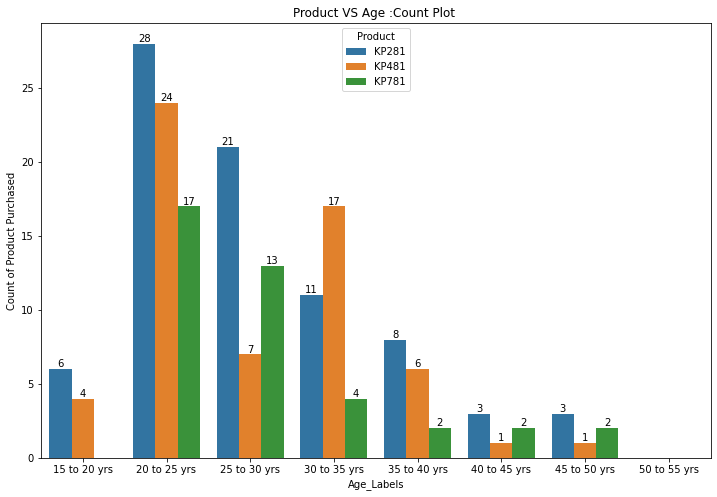

In [185]:
# Countplot of Age  - Showing how many products of each category bought by each Age group 

plt.figure(figsize=(12,8))
ax = sns.countplot(data =df_copy,x='Age_Labels',hue='Product')

for i in ax.containers:
    ax.bar_label(i)
    
plt.ylabel('Count of Product Purchased')
plt.title('Product VS Age :Count Plot ')
plt.show()

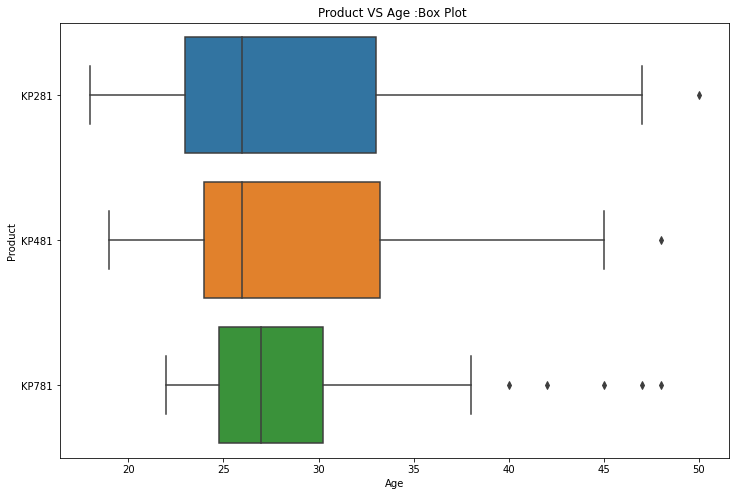

In [186]:
plt.figure(figsize=(12,8))
sns.boxplot(data =df,x='Age',y='Product')
plt.title('Product VS Age :Box Plot ')
plt.show()

In [187]:
# To get exact Quartile 1 and Quartile 3 values in above box plot 
print('KP281 :Q1=',np.percentile(df.loc[df['Product']=='KP281','Age'],25),end=",")
print('Q3=',np.percentile(df.loc[df['Product']=='KP281','Age'],75))

print('KP481 :Q1=',np.percentile(df.loc[df['Product']=='KP481','Age'],25),end=",")
print('Q3=',np.percentile(df.loc[df['Product']=='KP481','Age'],75))

print('KP781 :Q1=',np.percentile(df.loc[df['Product']=='KP781','Age'],25),end=",")
print('Q3=',np.percentile(df.loc[df['Product']=='KP781','Age'],75))

KP281 :Q1= 23.0,Q3= 33.0
KP481 :Q1= 24.0,Q3= 33.25
KP781 :Q1= 24.75,Q3= 30.25


### Observation :- 
- From above count plot we can observe that people with age 15 to 30 years buy 'KP281' treadmill most as compared to others . People within age group 30 to 35 buy 'KP481' most this can be expected as this age group people are all middle aged people / adults who have money to spare/have savings to buy a little more expensive model then the most basic one 'KP281' . So as age becomes greate than 35 we observe there is very less difference in number of products bought for each catergory -KP281,KP481 and KP781 . This also shows that as age increases , probability of people buying higher range models also increases 
- From box plot we can see that for KP281 50% of data (IQR) lies in age group around 23 to 33 ,for KP481 50% of data (IQR) lies in age group around 24 to 33.25 and for KP781 50% of data (IQR) lies in age group around 24.75 to 30.25 . So from this we can conclude that large range ( large IQR ) of people of different ages tend to buy KP281 and KP481 .


### Usage Vs Product

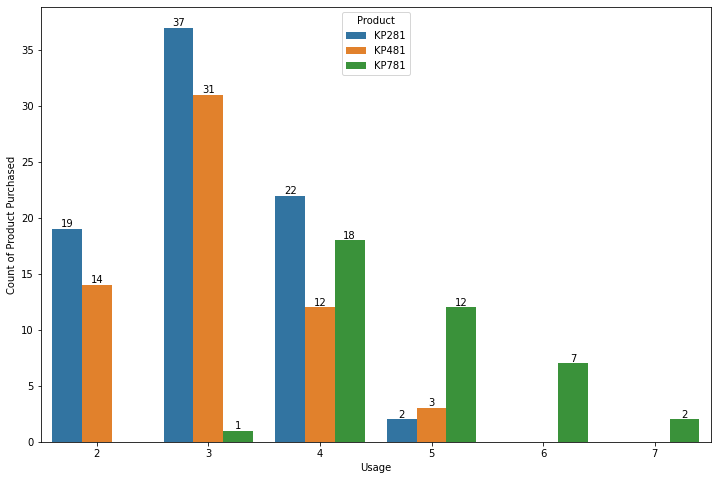

In [188]:

plt.figure(figsize=(12,8))
ax = sns.countplot(data =df,x='Usage',hue='Product')

for i in ax.containers:
    ax.bar_label(i)
    
plt.ylabel('Count of Product Purchased')
plt.show()

### Observation :-
- We can observe that as Usage (average number of times the customer plans to use the treadmill each week) of customer increases they tend to buy KP781 as compared to other models .So heavy users (usage >=5 in week) of treadmill will buy the most expensive model of tradmill KP781 .

### Income Vs Product 

In [189]:
# Creatig Bins and Labels for Income column 
bins   = [25000,50000,75000,100000,125000]
labels = ['25K - 50K','50K -75K','75K-100K','100K -125K']

df_copy['Income_Labels'] = pd.cut(x=df['Income'],bins =bins,labels =labels)
df_copy

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Labels,Income_Labels
0,KP281,18,Male,14,Single,3,4,29562,112,15 to 20 yrs,25K - 50K
1,KP281,19,Male,15,Single,2,3,31836,75,15 to 20 yrs,25K - 50K
2,KP281,19,Female,14,Partnered,4,3,30699,66,15 to 20 yrs,25K - 50K
3,KP281,19,Male,12,Single,3,3,32973,85,15 to 20 yrs,25K - 50K
4,KP281,20,Male,13,Partnered,4,2,35247,47,15 to 20 yrs,25K - 50K
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,35 to 40 yrs,75K-100K
176,KP781,42,Male,18,Single,5,4,89641,200,40 to 45 yrs,75K-100K
177,KP781,45,Male,16,Single,5,5,90886,160,40 to 45 yrs,75K-100K
178,KP781,47,Male,18,Partnered,4,5,104581,120,45 to 50 yrs,100K -125K


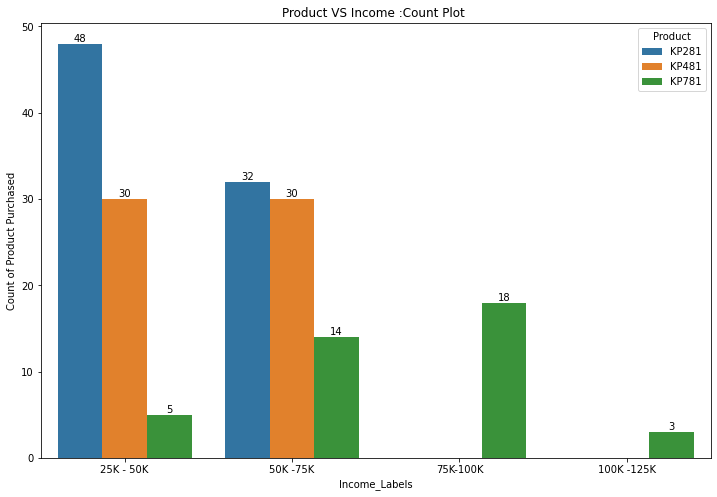

In [213]:

plt.figure(figsize=(12,8))
ax = sns.countplot(data =df_copy,x='Income_Labels',hue='Product')

for i in ax.containers:
    ax.bar_label(i)
    
plt.ylabel('Count of Product Purchased')
plt.title('Product VS Income :Count Plot ')
plt.show()

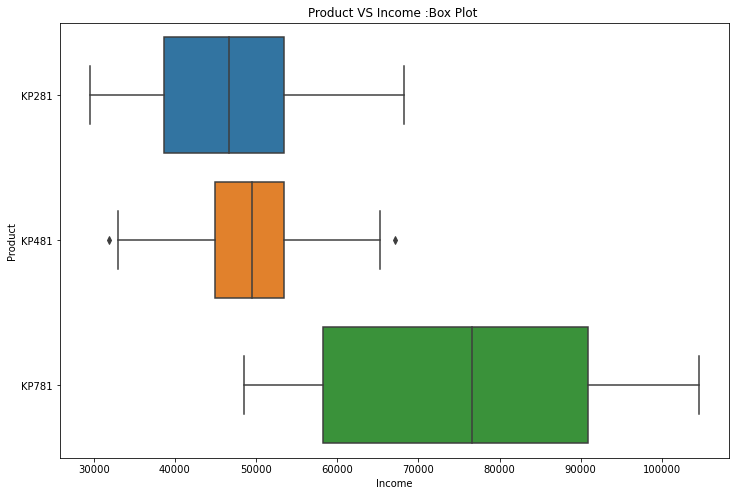

In [192]:
plt.figure(figsize=(12,8))
sns.boxplot(data =df,x='Income',y='Product')
plt.title('Product VS Income :Box Plot ')
plt.show()

### Observation :-
- KP281 cost 1500 dollors , KP481 cost 1750 dollors , KP781 cost 2500 dollors .
- From count plot we can observe that people having income 25-50K buy KP281 most as it is the cheapest and most affordable for them . People having income 50-75K buy KP281 and KP481 most , this is expected as they have higher income compared to 25 -50K group so they can easilty buy KP481 or KP281  . People having income > 75K dollors buy KP781 only , which is the most expensive model .
- From Box plot we can see as income increase the chances of buying higher priced tredmill also increase . 

### Education Vs Product

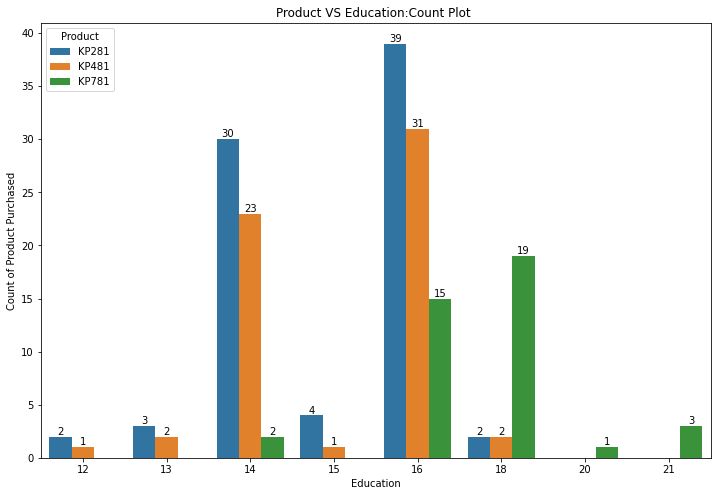

In [214]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data =df,x='Education',hue='Product')

for i in ax.containers:
    ax.bar_label(i)
    
plt.ylabel('Count of Product Purchased')
plt.title('Product VS Education:Count Plot ')
plt.show()

### Observation:
- Higher educated people (Education greater 16) prefer buying KP781

## 4. Representing the marginal probability and conditional probabilities

### Product vs Income_Labels

In [193]:
# Contingency Table to count number of each products ordered by each Category of Income_Label people.
pd.crosstab(index=df_copy['Income_Labels'],columns=df_copy['Product'],margins=True)

Product,KP281,KP481,KP781,All
Income_Labels,,,,
25K - 50K,48,30,5,83
50K -75K,32,30,14,76
75K-100K,0,0,18,18
100K -125K,0,0,3,3
All,80,60,40,180


In [245]:
print('Marginal Probabilities - ')
print("Probability of the Product(KP281, KP481, or KP781) purchased by 25-50K income customer:",round(83/180,2))
print("Probability of the Product(KP281, KP481, or KP781) purchased by 50-75K income customer:",round(76/180,2))
print("Probability of the Product(KP281, KP481, or KP781) purchased by 75-100K income customer:",round(18/180,2))
print("Probability of the Product(KP281, KP481, or KP781) purchased by 100-125K income customer:",round(3/180,2))

print("Probability of buying Product KP281 :",round(80/180,2))
print("Probability of buying Product KP481 :",round(60/180,2))
print("Probability of buying Product KP781 :",round(40/180,2))

print('\nConditional Probabilities-')
print("Probability of the buying KP781 given that purchaser is 25-50K (Low) income customer:",round(5/83,2))
print("Probability of the buying KP281 given that purchaser is 25-50K (Low) income customer:",round(48/83,2))

print("Probability of the buying KP281 given that purchaser is 50-75K income customer:",round(32/76,2))

print("Probability of the buying KP781 given that purchaser is 75-100K(High) income customer:",round(18/18,2))

print("Probability of the buying KP781 given that purchaser is 100-125K(High) income customer:",round(3/3,2))
print("Probability of the buying KP281 given that purchaser is 100-125K(High) income customer:",round(0,2))


Marginal Probabilities - 
Probability of the Product(KP281, KP481, or KP781) purchased by 25-50K income customer: 0.46
Probability of the Product(KP281, KP481, or KP781) purchased by 50-75K income customer: 0.42
Probability of the Product(KP281, KP481, or KP781) purchased by 75-100K income customer: 0.1
Probability of the Product(KP281, KP481, or KP781) purchased by 100-125K income customer: 0.02
Probability of buying Product KP281 : 0.44
Probability of buying Product KP481 : 0.33
Probability of buying Product KP781 : 0.22

Conditional Probabilities-
Probability of the buying KP781 given that purchaser is 25-50K (Low) income customer: 0.06
Probability of the buying KP281 given that purchaser is 25-50K (Low) income customer: 0.58
Probability of the buying KP281 given that purchaser is 50-75K income customer: 0.42
Probability of the buying KP781 given that purchaser is 75-100K(High) income customer: 1.0
Probability of the buying KP781 given that purchaser is 100-125K(High) income custome

In [231]:
# Normalize = 'all' will normalize over all values. This will give values of Joint Probabilities
pd.crosstab(index=df_copy['Income_Labels'],columns=df_copy['Product'],normalize='all')

Product,KP281,KP481,KP781
Income_Labels,,,
25K - 50K,0.266667,0.166667,0.027778
50K -75K,0.177778,0.166667,0.077778
75K-100K,0.000000,0.000000,0.100000
100K -125K,0.000000,0.000000,0.016667


- Note : In above Table all values mentiones inside contingency table are joint probabilities 
- Like P[ (25-50K) and KP281] = 48/180 ==> 0.2667

### Observation:
-  KP781 is bought by people having Salary in range 75-125K , as Probability of buying KP781 given that purchaser is in 75-100K and 100-125K income range is 1 only (Sure event) .
- If person has income range 25-50K then it is higher chance that they are most likely to buy KP281 , as its prob. is 0.58 

### Product vs Gender

In [246]:
# Contingency Table to count number of each products ordered by Gender of people.
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [251]:
print('Marginal Probabilities - ')
print("Probability of the Product(KP281, KP481, or KP781) purchased by Female customer:",round(76/180,2))
print("Probability of the Product(KP281, KP481, or KP781) purchased by Male customer:",round(104/180,2))

print("Probability of buying Product KP281 :",round(80/180,2))
print("Probability of buying Product KP481 :",round(60/180,2))
print("Probability of buying Product KP781 :",round(40/180,2))

print('\nConditional Probabilities-')
print("Probability of the buying KP281 given that purchaser is Female customer:",round(40/76,2))
print("Probability of the buying KP481 given that purchaser is Female customer:",round(29/76,2))
print("Probability of the buying KP781 given that purchaser is Female customer:",round(7/76,2))

print("Probability of the buying KP281 given that purchaser is Male customer:",round(40/104,2))
print("Probability of the buying KP481 given that purchaser is Male customer:",round(31/104,2))
print("Probability of the buying KP781 given that purchaser is Male customer:",round(33/104,2))

print("Probability that customer is Male given that purchased model is KP781:",round(33/40,2))

Marginal Probabilities - 
Probability of the Product(KP281, KP481, or KP781) purchased by Female customer: 0.42
Probability of the Product(KP281, KP481, or KP781) purchased by Male customer: 0.58
Probability of buying Product KP281 : 0.44
Probability of buying Product KP481 : 0.33
Probability of buying Product KP781 : 0.22

Conditional Probabilities-
Probability of the buying KP281 given that purchaser is Female customer: 0.53
Probability of the buying KP481 given that purchaser is Female customer: 0.38
Probability of the buying KP781 given that purchaser is Female customer: 0.09
Probability of the buying KP281 given that purchaser is Male customer: 0.38
Probability of the buying KP481 given that purchaser is Male customer: 0.3
Probability of the buying KP781 given that purchaser is Male customer: 0.32
Probability that customer is Male given that purchased model is KP781: 0.82


### Observation :
- Probability of Buying KP281 buy all customers is around 44% , of Buying KP481 is 33% and of Buying KP781 is 22% 
- If the Customer is Female then there is a 53% chance that they will buy KP281 and this Percentage keeps on reducing as we go to higher models KP481 and KP781
- If KP781 is bought there is vey high probability (0.82) that customer is a Male

### Product Vs Fitness

In [253]:
pd.crosstab(index=df['Fitness'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,1,1,0,2
2,14,12,0,26
3,54,39,4,97
4,9,8,7,24
5,2,0,29,31
All,80,60,40,180


In [263]:
print('Marginal Probabilities - ')
print("Probability of Fitness Level 1 person Buying Product(KP281, KP481, or KP781) :",round(2/180,2))
print("Probability of Fitness Level 2 person Buying Product(KP281, KP481, or KP781) :",round(26/180,2))
print("Probability of Fitness Level 3 person Buying Product(KP281, KP481, or KP781) :",round(97/180,2))
print("Probability of Fitness Level 4 person Buying Product(KP281, KP481, or KP781) :",round(24/180,2))
print("Probability of Fitness Level 5 person Buying Product(KP281, KP481, or KP781) :",round(31/180,2))

print('\nConditional Probabilities-')
print("Probability of the buying KP281 given that purchaser has Fitness Level 1:",round(1/2,2))

print("Probability of the buying KP281 given that purchaser has Fitness Level 2:",round(14/26,2))

print("Probability of the buying KP281 given that purchaser has Fitness Level 3:",round(54/97,2))
print("Probability of the buying KP481 given that purchaser has Fitness Level 3:",round(39/97,2))

print("Probability of the buying KP281 given that purchaser has Fitness Level 4:",round(9/24,2))
print("Probability of the buying KP481 given that purchaser has Fitness Level 4:",round(8/24,2))

print("Probability of the buying KP281 given that purchaser has Fitness Level 5:",round(2/31,2))
print("Probability of the buying KP781 given that purchaser has Fitness Level 5:",round(29/31,2))

Marginal Probabilities - 
Probability of Fitness Level 1 person Buying Product(KP281, KP481, or KP781) : 0.01
Probability of Fitness Level 2 person Buying Product(KP281, KP481, or KP781) : 0.14
Probability of Fitness Level 3 person Buying Product(KP281, KP481, or KP781) : 0.54
Probability of Fitness Level 4 person Buying Product(KP281, KP481, or KP781) : 0.13
Probability of Fitness Level 5 person Buying Product(KP281, KP481, or KP781) : 0.17

Conditional Probabilities-
Probability of the buying KP281 given that purchaser has Fitness Level 1: 0.5
Probability of the buying KP281 given that purchaser has Fitness Level 2: 0.54
Probability of the buying KP281 given that purchaser has Fitness Level 3: 0.56
Probability of the buying KP481 given that purchaser has Fitness Level 3: 0.4
Probability of the buying KP281 given that purchaser has Fitness Level 4: 0.38
Probability of the buying KP481 given that purchaser has Fitness Level 4: 0.33
Probability of the buying KP281 given that purchaser h

### Observation :
- If the fitness level of person is 5 then they are most likely to buy KP781 treadmil
- If the fitness level of person is 1 or 2 or 3 then there is around 50% chance that they are most likely to buy KP281 treadmil . This is expected as they are they have low to moderate fitness level , they are either first time using Treadmil or not used to using it much , so as try purpose they are expected to buy lower model of treadmil .

### Product VS Marital Status

In [261]:
pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [267]:
print('Marginal Probabilities - ')
print("Probability of Partnered person Buying Product(KP281, KP481, or KP781) :",round(107/180,2))
print("Probability of Single Status person Buying Product(KP281, KP481, or KP781) :",round(73/180,2))


print('\nConditional Probabilities-')
print("Probability of the buying KP281 given that purchaser has Partnered Marital Status:",round(48/107,2))
print("Probability of the buying KP481 given that purchaser has Partnered Marital Status:",round(36/107,2))
print("Probability of the buying KP781 given that purchaser has Partnered Marital Status:",round(23/107,2))

print("Probability of the buying KP281 given that purchaser has Single Marital Status:",round(32/73,2))
print("Probability of the buying KP481 given that purchaser has Single Marital Status:",round(24/73,2))
print("Probability of the buying KP781 given that purchaser has Single Marital Status:",round(17/73,2))

Marginal Probabilities - 
Probability of Partnered person Buying Product(KP281, KP481, or KP781) : 0.59
Probability of Single Status person Buying Product(KP281, KP481, or KP781) : 0.41

Conditional Probabilities-
Probability of the buying KP281 given that purchaser has Partnered Marital Status: 0.45
Probability of the buying KP481 given that purchaser has Partnered Marital Status: 0.34
Probability of the buying KP781 given that purchaser has Partnered Marital Status: 0.21
Probability of the buying KP281 given that purchaser has Single Marital Status: 0.44
Probability of the buying KP481 given that purchaser has Single Marital Status: 0.33
Probability of the buying KP781 given that purchaser has Single Marital Status: 0.23


### Observation:
- Partnered Marital Status person is more likely to buy any one of the products 
- Probability of Buying KP281 by Partenred or Single Marital Status person is higherer compared to other models.

### Product VS Age

In [265]:
pd.crosstab(index=df_copy['Age_Labels'],columns=df_copy['Product'],margins=True)

Product,KP281,KP481,KP781,All
Age_Labels,,,,
15 to 20 yrs,6,4,0,10
20 to 25 yrs,28,24,17,69
25 to 30 yrs,21,7,13,41
30 to 35 yrs,11,17,4,32
35 to 40 yrs,8,6,2,16
40 to 45 yrs,3,1,2,6
45 to 50 yrs,3,1,2,6
All,80,60,40,180


In [270]:
print('Marginal Probabilities - ')
print("Probability of 20 to 25 yrs old Person Buying Product(KP281, KP481, or KP781) :",round(69/180,2))
print("Probability of 25 to 30 yrs old Person Buying Product(KP281, KP481, or KP781) :",round(41/180,2))
print("Probability of 30 to 35 yrs old Person Buying Product(KP281, KP481, or KP781) :",round(32/180,2))


print('\nConditional Probabilities-')
print("Probability of the buying KP281 given that purchaser is in age group 20 to 25:",round(28/69,2))
print("Probability of the buying KP481 given that purchaser is in age group 20 to 25:",round(24/69,2))
print("Probability of the buying KP781 given that purchaser is in age group 20 to 25:",round(17/69,2))

print("Probability of the buying KP281 given that purchaser is in age group 40 to 45:",round(3/6,2))
print("Probability of the buying KP481 given that purchaser is in age group 40 to 45:",round(1/6,2))
print("Probability of the buying KP781 given that purchaser is in age group 40 to 45:",round(2/6,2))

Marginal Probabilities - 
Probability of 20 to 25 yrs old Person Buying Product(KP281, KP481, or KP781) : 0.38
Probability of 25 to 30 yrs old Person Buying Product(KP281, KP481, or KP781) : 0.23
Probability of 30 to 35 yrs old Person Buying Product(KP281, KP481, or KP781) : 0.18

Conditional Probabilities-
Probability of the buying KP281 given that purchaser is in age group 20 to 25: 0.41
Probability of the buying KP481 given that purchaser is in age group 20 to 25: 0.35
Probability of the buying KP781 given that purchaser is in age group 20 to 25: 0.25
Probability of the buying KP281 given that purchaser is in age group 40 to 45: 0.5
Probability of the buying KP481 given that purchaser is in age group 40 to 45: 0.17
Probability of the buying KP781 given that purchaser is in age group 40 to 45: 0.33


### Observation:
- Most of Buyers buying product belong to age group 20 to 25 yrs , follwed by 25 to 30 years and 30 to 35 years .
- We observe that as age increases the probability of buying KP781 increases . 

## 5. Checking correlation among different factors using heat maps

In [175]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


- Note : Higher the magnitude of coefficient of correlation , more the variable are correlated .

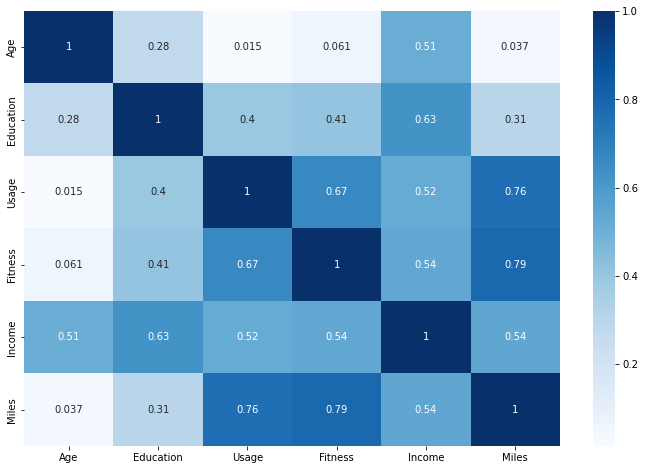

In [180]:
# Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

### Observation:
- We can see that Fitness and Miles , Miles and Usage are highly correlated . It means that if Customer Usage is high then he/she is expected to walk larger number of miles each week and hence they are more prone to be Fit (more fitness level).
- Income and Education are are also highly correlated ,it means high income perople tend to be more educated .
- There is very less correlation between Age and Fitness  , Age and Usage, Age and Miles

### Insights:
- Model KP281 is the best-selling product. 44% of treadmill sold are KP281.
- The majority of customers fall within the 25000 - 75000 dollors income slab.
- Most of Buyers buying product belong to age group 20 to 25 yrs (around 38%) , follwed by 25 to 30 years (23%) and 30 to 35 years .
- We can see that Fitness and Miles , Miles and Usage are highly correlated . It means that if Customer Usage is high then he/she is expected to walk larger number of miles each week and hence they are more prone to be Fit (more fitness level).
- Income and Education are are also highly correlated ,it means high income perople tend to be more educated 
- Customers belonging to low income class, or if customer is in age 15 to 20 years or people with fitness level below 3 are not buying KP781.
- If the fitness level of person is 5 then they are most likely to buy KP781 treadmil
- If the fitness level of person is 1 or 2 or 3 then there is around 50% chance that they are most likely to buy KP281 treadmil . This is expected as they are they have low to moderate fitness level , they are either first time using Treadmil or not used to using it much , so as try purpose (just strating) they are expected to buy lower model of treadmil and try it .
- KP781 is bought by people having Salary in range 75-125K , as Probability of buying KP781 given that purchaser is in 75-100K and 100-125K income range is 1 only (Sure event) .
- If person has income range 25-50K then it is higher chance that they are most likely to buy KP281 , as its prob. is 0.58
- More customers have Marital Status as Partnered and have gender as Male


### Recommendations
- KP281 & KP481 are popular with customers income of 25,000 and 75,000 dollors . Aerobit should introduce certain schemes like No COst EMI , Stock Clearence Sale , Festival Sale , Discount on Bulk Purchase . Doing this will introduce more customers and will also push users of salary income to buy even KP781 which is currently only bought by people having income > 75000 dollors 
- KP781 should be showcased as a Premium Model and marketing it to the customers from high income groups which could result in more sales.
- Aerofit could incloude mid range models between KP481 and KP781 as the cost discrpency between 2 is large . So models havuing price range greater than KP481 but less than KP781 will push and encourage some of the userbase of KP281 and KP481 towards newer models .
- The KP781 is a Premium Model, so it is suited for professionals , shwing the KP781 in sports fests and tournaments will increase the customer base of KP781 .
- Aerofit should adopt strategy where they introduce treadmill models with different colour based on Male or Female Preference . Design Customization of treadmill is one of the ways customer can give a unique loop to their treadmill model . This uniquie design custimization can start from KP481 and above models .